In [ ]:
# mounting google drive into the colab session
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Gym Monitor Data Plotter for the Experiments

The plotter function defined in the experiment notebooks does not have standardized axes definitions which makes the comparison of different approaches really harder.
Therefore, in below four sections we define plotter functions, and load the monitor data csv files for generating the experiment summarizing plots.

## Table of Contents

* [`Algorithm Performance Comparison Experiment`](#algorithm-performance-comparison-experiment)
* [`MORS Comparison Baseline Experiment`](#mors-comparison-baseline-experiment)
* [`Approach Scalability Analysis Experiment`](#approach-scalability-analysis-experiment)
* [`Dynamic Agent Interactions Analysis Experiment`](#dynamic-agent-interactions-analysis-experiment)

**Note:** This notebook contains multiple repetitions of `moving_average` and `plot_vanilla` functions as the experiments were added iteratively after successful execution of the previous ones.
This has made the notebook structure a bit bulky to read, but all sections after the initial import setups from section one can be executed independently.

<a id='algorithm-performance-comparison-experiment'></a>
### Algorithm Performance Comparison Experiment

In this section we load the result summary files recorded from Gym Monitor wrapper and plot the experiment result subplots from the plotter function.
We follow the stated workflow steps below in the section for reference.

* First, we observe the list of experiment files generated for our experiment one.
* Second, we define the import statements requirement for the whole notebook. 
* Additionally, extra fonts are also installed to specifically add the _'Times New Roman'_ font for the plots.
* Finally, for all four subplots we load the corresponding experiment _csv_ files, and define _plot\_vanilla_ plotter function with appropriate titles, labels, and color combinations.

`Note:` The specified _directory paths_ will vary based on your project structure, please update those paths based on your requirement. The keyword `TODO` is added on the code cells where path update is required.

#### 0. Import and Initial Notebook Setup:
`For executing any of the experiment sections independently the below stated imports require to be executed once.`

In [ ]:
# TODO: the path below needs to be update based on your project setup
!ls drive/MyDrive/rl_individual_project/experiment-data/experiment-one

3x3-a2c-gov-results.csv		rand-3x3-a2c-gov-results.csv
3x3-a2c-greedy-gov-results.csv	rand-3x3-a2c-greedy-gov-results.csv
3x3-ppo-gov-results.csv		rand-3x3-ppo-gov-results.csv
3x3-ppo-greedy-gov-results.csv	rand-3x3-ppo-greedy-gov-results.csv


In [ ]:
# import statement for plotting
# and csv data file processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

In [ ]:
# installing fonts for matplotlib library plotting
!sudo apt install msttcorefonts -qq
!rm ~/.cache/matplotlib -rf

The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  cabextract libmspack0 python3-chardet python3-debconf python3-debian
  python3-distro-info python3-distupgrade python3-pkg-resources python3-six
  python3-update-manager ubuntu-release-upgrader-core update-manager-core
  update-notifier-common xfonts-encodings xfonts-utils
Suggested packages:
  python3-setuptools python3-launchpadlib
The following NEW packages will be installed:
  cabextract libmspack0 python3-chardet python3-debconf python3-debian
  python3-distro-info python3-distupgrade python3-pkg-resources python3-six
  python3-update-manager ttf-mscorefonts-installer
  ubuntu-release-upgrader-core update-manager-core update-notifier-common
  xfonts-encodings xfonts-utils
0 upgraded, 16 newly installed, 0 to remove and 27 not upgraded.
Need to get 1,332 kB of archives.
After this operation

In [ ]:
# reviewing the newly installed fonts for plotting
import matplotlib as mpl
font_paths = mpl.font_manager.findSystemFonts()
font_objects = mpl.font_manager.createFontList(font_paths)
font_names = [f.name for f in font_objects]
print(font_names)

['Trebuchet MS', 'Comic Sans MS', 'Arial', 'Trebuchet MS', 'Liberation Sans Narrow', 'Georgia', 'Courier New', 'Liberation Sans', 'Times New Roman', 'Arial Black', 'Trebuchet MS', 'Courier New', 'Verdana', 'Liberation Serif', 'Times New Roman', 'Liberation Mono', 'Times New Roman', 'Times New Roman', 'Times New Roman', 'Liberation Sans', 'Arial', 'Liberation Sans Narrow', 'Times New Roman', 'Arial', 'Liberation Serif', 'Liberation Sans', 'Andale Mono', 'Trebuchet MS', 'Andale Mono', 'Webdings', 'Times New Roman', 'Courier New', 'Liberation Mono', 'Arial', 'Courier New', 'Arial', 'Impact', 'Verdana', 'Arial', 'Georgia', 'Comic Sans MS', 'Georgia', 'Impact', 'Liberation Mono', 'Courier New', 'Verdana', 'Comic Sans MS', 'Verdana', 'Trebuchet MS', 'Georgia', 'Verdana', 'Liberation Sans', 'Liberation Sans Narrow', 'Humor Sans', 'Webdings', 'Times New Roman', 'Courier New', 'Georgia', 'Georgia', 'Courier New', 'Liberation Serif', 'Georgia', 'Verdana', 'Arial', 'Liberation Sans Narrow', 'Libe

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# import statements from matplotlib package font style setup
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
# setting up the plotter function with 'Times New Roman' font style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [ ]:
# setting up the plotter function with 'Times New Roman' font style
sns.set(font="Times New Roman")
sns.set_style({'font.family': 'Times New Roman'})

#### 1. First Performance Comparison Subplot

In [ ]:
# loading the csv file data into pandas dataframe
# TODO: the path below needs to be update based on your project setup
tmp_df = pd.read_csv('drive/MyDrive/rl_individual_project/experiment-data/experiment-one/3x3-a2c-gov-results.csv')
tmp_df.head()

,r,l,t
0,0.21,20,0.037646
1,0.26,32,0.081548
2,0.23,20,0.106730
3,0.24,20,0.131439
4,0.25,24,0.161813


In [ ]:
# loading the other comparative csv file data into pandas dataframe
# TODO: the path below needs to be update based on your project setup
tmp1_df = pd.read_csv('drive/MyDrive/rl_individual_project/experiment-data/experiment-one/3x3-ppo-gov-results.csv')
tmp1_df.head()

,r,l,t
0,0.30,22,0.024071
1,0.30,14,0.034085
2,0.21,30,0.053929
3,0.26,18,0.066222
4,0.35,18,0.078066


In [ ]:
# moving average value calculator function
# for generating more smoother convergence plots
def moving_average(values, window):
    """
    Smooth values by doing a moving average
    :param values: (numpy array)
    :param window: (int)
    :return: (numpy array)
    """
    weights = np.repeat(1.0, window) / window
    return np.convolve(values, weights, 'valid')

In [ ]:
# calculating the moving average value for the two comparative models
arr = moving_average(list(tmp1_df['r']), 100)
arr1 = moving_average(list(tmp_df['r']), 100)

In [ ]:
# plotter function for plotting the two comparative models with hard-coded
# labels, titles, timestep cut-off threshold and color combinations
def plot_vanilla(data_list, min_len):
    sns.set_style("whitegrid", {'axes.grid' : True,
                            'axes.edgecolor':'black'

                            })
    fig = plt.figure()
    sns.set(font="Times New Roman", rc={'figure.figsize':(6.25,5.25)})
    sns.set_style({'font.family': 'Times New Roman'})
    plt.clf()
    ax = fig.gca()
    colors = [ "forestgreen", "cornflowerblue"]
    labels = ["PPO with Governance", "A2C with Governance"]
    color_patch = []
    for color, label, data in zip(colors, labels, data_list):
        sns.lineplot(data=data, color=color, linewidth=2.5)
        color_patch.append(mpatches.Patch(color=color, label=label))
    print(min_len)
    plt.xlim([0, min_len])
    plt.xlabel('Training Episodes ($\\times$30)', fontsize=22)
    plt.ylabel('Average Reward Returns', fontsize=22)
    lgd=plt.legend(
    frameon=True, fancybox=True, \
    # prop={'size':14}, handles=color_patch, loc="best")
    prop={'weight':'bold', 'size':16}, handles=color_patch, loc="best")
    plt.title('A. 3$\\times$3 Road Env', fontsize=24 )
    ax = plt.gca()
    # ax.set_xticks([10, 20, 30, 40, 50])
    # ax.set_xticklabels([0.5, 1, 1.5, 2.5, 3.0])

    plt.setp(ax.get_xticklabels(), fontsize=16)
    plt.setp(ax.get_yticklabels(), fontsize=16)
    sns.despine()
    plt.tight_layout()
    plt.show()

2500


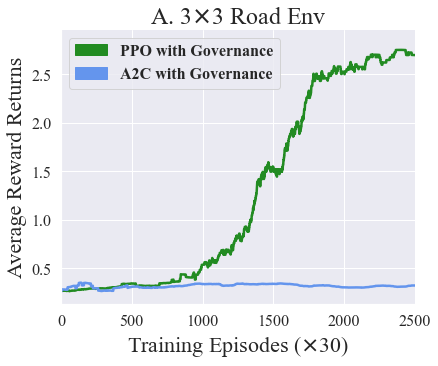

In [ ]:
# plotter function output for the models under comparison
plot_vanilla([ arr , arr1 ], 2500)

#### 2. Second Performance Comparison Subplot

In [ ]:
# loading the csv file data into pandas dataframe
# TODO: the path below needs to be update based on your project setup
tmp_df = pd.read_csv('drive/MyDrive/rl_individual_project/experiment-data/experiment-one/3x3-ppo-greedy-gov-results.csv')
tmp_df.head()

,r,l,t
0,0.19,32,0.146356
1,0.27,24,0.214407
2,0.26,18,0.268003
3,0.18,18,0.320436
4,0.22,24,0.426739


In [ ]:
# loading the csv file data into pandas dataframe
# TODO: the path below needs to be update based on your project setup
tmp1_df = pd.read_csv('drive/MyDrive/rl_individual_project/experiment-data/experiment-one/3x3-a2c-greedy-gov-results.csv')
tmp1_df.head()

,r,l,t
0,0.20,18,0.032702
1,0.20,16,0.055616
2,0.20,28,0.091656
3,0.22,22,0.118003
4,0.28,18,0.145380


In [ ]:
# moving average value calculator function
# for generating more smoother convergence plots
arr = moving_average(list(tmp_df['r']), 100)
arr1 = moving_average(list(tmp1_df['r']), 100)

In [ ]:
# plotter function for plotting the two comparative models with hard-coded
# labels, titles, timestep cut-off threshold and color combinations
def plot_vanilla(data_list, min_len):
    sns.set_style("whitegrid", {'axes.grid' : True,
                            'axes.edgecolor':'black'

                            })
    fig = plt.figure()
    sns.set(font="Times New Roman", rc={'figure.figsize':(6.25,5.25)})
    sns.set_style({'font.family': 'Times New Roman'})
    plt.clf()
    ax = fig.gca()
    colors = [ "forestgreen", "cornflowerblue"]
    labels = ["PPO with Greedy Governance", "A2C with Greedy Governance"]
    color_patch = []
    for color, label, data in zip(colors, labels, data_list):
        sns.lineplot(data=data, color=color, linewidth=2.5)
        color_patch.append(mpatches.Patch(color=color, label=label))
    print(min_len)
    plt.xlim([0, min_len])
    plt.xlabel('Training Episodes ($\\times$30)', fontsize=22)
    plt.ylabel('Average Reward Returns', fontsize=22)
    lgd=plt.legend(
    frameon=True, fancybox=True, \
    # prop={'size':14}, handles=color_patch, loc="best")
    prop={'weight':'bold', 'size':16}, handles=color_patch, loc="best")
    plt.title('B. 3$\\times$3 Road Env', fontsize=24 )
    ax = plt.gca()
    # ax.set_xticks([10, 20, 30, 40, 50])
    # ax.set_xticklabels([0.5, 1, 1.5, 2.5, 3.0])

    plt.setp(ax.get_xticklabels(), fontsize=16)
    plt.setp(ax.get_yticklabels(), fontsize=16)
    sns.despine()
    plt.tight_layout()
    plt.show()

2500


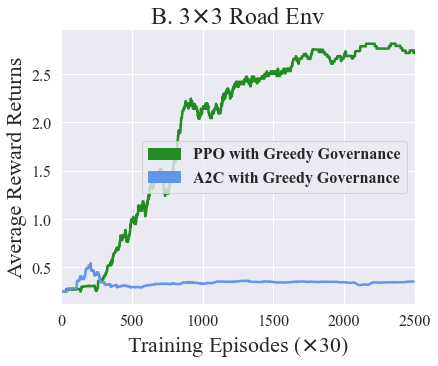

In [ ]:
# plotter function output for the models under comparison
plot_vanilla([ arr , arr1 ], 2500)

#### 3. Third Performance Comparison Subplot

In [ ]:
# loading the csv file data into pandas dataframe
# TODO: the path below needs to be update based on your project setup
tmp_df = pd.read_csv('drive/MyDrive/rl_individual_project/experiment-data/experiment-one/3x3-ppo-greedy-gov-results.csv')
tmp_df.head()

,r,l,t
0,0.19,32,0.146356
1,0.27,24,0.214407
2,0.26,18,0.268003
3,0.18,18,0.320436
4,0.22,24,0.426739


In [ ]:
# loading the csv file data into pandas dataframe
# TODO: the path below needs to be update based on your project setup
tmp1_df = pd.read_csv('drive/MyDrive/rl_individual_project/experiment-data/experiment-one/3x3-ppo-gov-results.csv')
tmp1_df.head()

,r,l,t
0,0.30,22,0.024071
1,0.30,14,0.034085
2,0.21,30,0.053929
3,0.26,18,0.066222
4,0.35,18,0.078066


In [ ]:
# calculating the moving average value for the two comparative models
arr = moving_average(list(tmp1_df['r']), 100)
arr1 = moving_average(list(tmp_df['r']), 100)

In [ ]:
# plotter function for plotting the two comparative models with hard-coded
# labels, titles, timestep cut-off threshold and color combinations
def plot_vanilla(data_list, min_len):
    sns.set_style("whitegrid", {'axes.grid' : True,
                            'axes.edgecolor':'black'

                            })
    fig = plt.figure()
    sns.set(font="Times New Roman", rc={'figure.figsize':(6.25,5.25)})
    sns.set_style({'font.family': 'Times New Roman'})
    plt.clf()
    ax = fig.gca()
    colors = [ "forestgreen", "darkorange"]
    labels = ["Baseline Radial Governance", "Greedy Radial Governance"]
    color_patch = []
    for color, label, data in zip(colors, labels, data_list):
        sns.lineplot(data=data, color=color, linewidth=2.5)
        color_patch.append(mpatches.Patch(color=color, label=label))
    print(min_len)
    plt.xlim([0, min_len])
    plt.xlabel('Training Episodes ($\\times$15)', fontsize=22)
    plt.ylabel('Average Reward Returns', fontsize=22)
    lgd=plt.legend(
    frameon=True, fancybox=True, \
    # prop={'size':14}, handles=color_patch, loc="best")
    prop={'weight':'bold', 'size':16}, handles=color_patch, loc="best")
    plt.title('C. 3$\\times$3 Road Env', fontsize=24 )
    ax = plt.gca()
    # ax.set_xticks([10, 20, 30, 40, 50])
    # ax.set_xticklabels([0.5, 1, 1.5, 2.5, 3.0])

    plt.setp(ax.get_xticklabels(), fontsize=16)
    plt.setp(ax.get_yticklabels(), fontsize=16)
    sns.despine()
    plt.tight_layout()
    plt.show()

5000


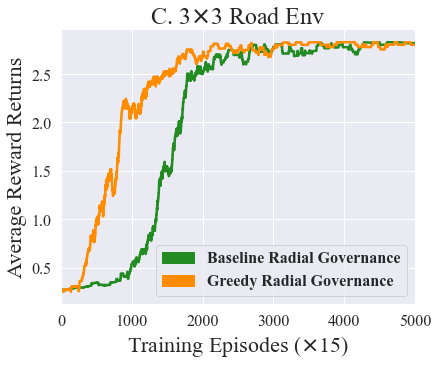

In [ ]:
# plotter function output for the models under comparison
plot_vanilla([ arr , arr1 ], 5000)

#### 4. Fourth Performance Comparison Subplot

In [ ]:
# loading the csv file data into pandas dataframe
# TODO: the path below needs to be update based on your project setup
tmp_df = pd.read_csv('drive/MyDrive/rl_individual_project/experiment-data/experiment-one/rand-3x3-ppo-gov-results.csv')
tmp_df.head()

,r,l,t
0,0.32,14,13.273600
1,0.26,14,13.283121
2,0.30,18,13.295143
3,0.31,14,13.304652
4,0.30,16,13.319686


In [ ]:
# loading the csv file data into pandas dataframe
# TODO: the path below needs to be update based on your project setup
tmp1_df = pd.read_csv('drive/MyDrive/rl_individual_project/experiment-data/experiment-one/rand-3x3-ppo-greedy-gov-results.csv')
tmp1_df.head()

,r,l,t
0,0.20,20,0.024274
1,0.27,20,0.039575
2,0.31,16,0.053041
3,0.17,24,0.072833
4,0.22,14,0.084675


In [ ]:
# calculating the moving average value for the two comparative models
arr = moving_average(list(tmp_df['r']), 100)
arr1 = moving_average(list(tmp1_df['r']), 100)

In [ ]:
# plotter function for plotting the two comparative models with hard-coded
# labels, titles, timestep cut-off threshold and color combinations
def plot_vanilla(data_list, min_len):
    sns.set_style("whitegrid", {'axes.grid' : True,
                            'axes.edgecolor':'black'

                            })
    fig = plt.figure()
    sns.set(font="Times New Roman", rc={'figure.figsize':(6.25,5.25)})
    sns.set_style({'font.family': 'Times New Roman'})
    plt.clf()
    ax = fig.gca()
    colors = [ "forestgreen", "darkorange"]
    labels = ["Baseline Radial Governance", "Greedy Radial Governance"]
    color_patch = []
    for color, label, data in zip(colors, labels, data_list):
        sns.lineplot(data=data, color=color, linewidth=2.5)
        color_patch.append(mpatches.Patch(color=color, label=label))
    print(min_len)
    plt.xlim([0, min_len])
    plt.xlabel('Training Episodes ($\\times$15)', fontsize=22)
    plt.ylabel('Average Reward Returns', fontsize=22)
    lgd=plt.legend(
    frameon=True, fancybox=True, \
    # prop={'size':14}, handles=color_patch, loc="best")
    prop={'weight':'bold', 'size':16}, handles=color_patch, loc="best")
    plt.title('D. 3$\\times$3 Random Orientation Road Env', fontsize=24 )
    ax = plt.gca()
    # ax.set_xticks([10, 20, 30, 40, 50])
    # ax.set_xticklabels([0.5, 1, 1.5, 2.5, 3.0])

    plt.setp(ax.get_xticklabels(), fontsize=16)
    plt.setp(ax.get_yticklabels(), fontsize=16)
    sns.despine()
    plt.tight_layout()
    plt.show()

5000


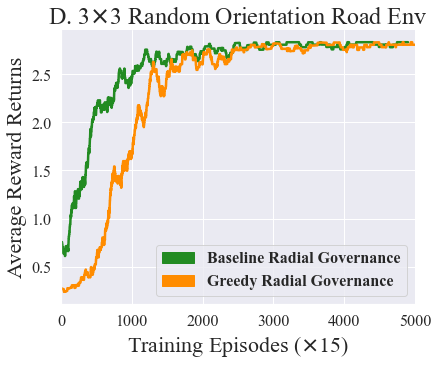

In [ ]:
# plotter function output for the models under comparison
plot_vanilla([ arr , arr1 ], 5000)

<a id='mors-comparison-baseline-experiment'></a>
#### MORS Comparison Baseline Experiment

In this section we load the result summary files recorded from Gym Monitor wrapper and plot the experiment result subplots from the plotter function.
This section contains experiment csv files from the third MORS baseline comparison experiment for analysis and visualization.
We follow the stated workflow steps below in the section for reference.

* First, we again observe the list of experiment files generated for our MORS comparison experiment.
* Second, for all four subplots we load the corresponding experiment _csv_ files, and define _plot\_vanilla_ plotter function with appropriate titles, labels, and color combinations.

`Note:` The specified _directory paths_ will vary based on your project structure, please update those paths based on your requirement. The keyword `TODO` is added on the code cells where path update is required.

#### 1. First Performance Comparison Subplot

In [ ]:
# TODO: the path below needs to be update based on your project setup
!ls drive/MyDrive/rl_individual_project/experiment-data/experiment-three

3x3-ppo-gov-results.csv       rand-3x3-ppo-gov-results.csv
3x3-ppo-rew-shap-results.csv  rand-3x3-ppo-rew-shap-results.csv
5x5-ppo-gov-results.csv       rand-5x5-ppo-gov-results.csv
5x5-ppo-rew-shap-results.csv  rand-5x5-ppo-rew-shap-results.csv


In [ ]:
# loading the csv file data into pandas dataframe
# TODO: the path below needs to be update based on your project setup
tmp_df = pd.read_csv('drive/MyDrive/rl_individual_project/experiment-data/experiment-three/3x3-ppo-gov-results.csv')
tmp_df.head()

,r,l,t
0,0.61,18,0.440833
1,0.83,14,0.451440
2,0.59,22,0.468895
3,0.41,18,0.482318
4,0.29,24,0.500439


In [ ]:
# loading the csv file data into pandas dataframe
# TODO: the path below needs to be update based on your project setup
tmp1_df = pd.read_csv('drive/MyDrive/rl_individual_project/experiment-data/experiment-three/3x3-ppo-rew-shap-results.csv')
tmp1_df.head()

,r,l,t
0,0.07,16,0.027765
1,0.13,18,0.044404
2,-0.05,32,0.075133
3,0.08,32,0.105542
4,0.02,20,0.123990


In [ ]:
# moving average value calculator function
# for generating more smoother convergence plots
def moving_average(values, window):
    """
    Smooth values by doing a moving average
    :param values: (numpy array)
    :param window: (int)
    :return: (numpy array)
    """
    weights = np.repeat(1.0, window) / window
    return np.convolve(values, weights, 'valid')

In [ ]:
# calculating the moving average value for the two comparative models
arr = moving_average(list(tmp_df['r']), 100)
arr1 = moving_average(list(tmp1_df['r']), 100)

In [ ]:
# plotter function for plotting the two comparative models with hard-coded
# labels, titles, timestep cut-off threshold and color combinations
def plot_vanilla(data_list, min_len):
    sns.set_style("whitegrid", {'axes.grid' : True,
                            'axes.edgecolor':'black'

                            })
    fig = plt.figure()
    sns.set(font="Times New Roman", rc={'figure.figsize':(6.25,5.25)})
    sns.set_style({'font.family': 'Times New Roman'})
    plt.clf()
    ax = fig.gca()
    colors = [ "forestgreen", "mediumpurple"]
    labels = ["PPO with Directional Governance", "PPO with MORS Approach"]
    color_patch = []
    for color, label, data in zip(colors, labels, data_list):
        sns.lineplot(data=data, color=color, linewidth=2.5)
        color_patch.append(mpatches.Patch(color=color, label=label))
    print(min_len)
    plt.xlim([0, min_len])
    plt.xlabel('Training Episodes ($\\times$15)', fontsize=22)
    plt.ylabel('Average Reward Returns', fontsize=22)
    lgd=plt.legend(
    frameon=True, fancybox=True, \
    # prop={'size':14}, handles=color_patch, loc="best")
    prop={'weight':'bold', 'size':16}, handles=color_patch, loc="best")
    plt.title('A. 3$\\times$3 Road Env', fontsize=24 )
    ax = plt.gca()
    # ax.set_xticks([10, 20, 30, 40, 50])
    # ax.set_xticklabels([0.5, 1, 1.5, 2.5, 3.0])

    plt.setp(ax.get_xticklabels(), fontsize=16)
    plt.setp(ax.get_yticklabels(), fontsize=16)
    sns.despine()
    plt.tight_layout()
    plt.show()

5000


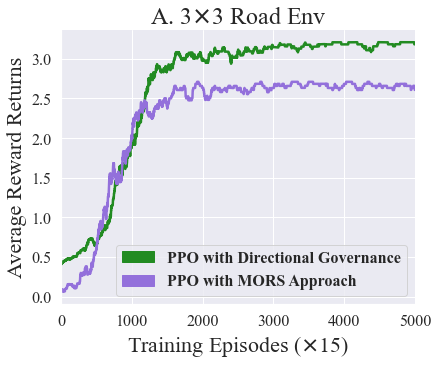

In [ ]:
# plotter function output for the models under comparison
plot_vanilla([ arr , arr1 ], 5000)

#### 2. Second Performance Comparison Subplot

In [ ]:
# loading the csv file data into pandas dataframe
# TODO: the path below needs to be update based on your project setup
tmp_df = pd.read_csv('drive/MyDrive/rl_individual_project/experiment-data/experiment-three/rand-3x3-ppo-gov-results.csv')
tmp_df.head()

,r,l,t
0,0.75,14,0.023077
1,0.41,16,0.034929
2,0.31,16,0.047280
3,0.29,18,0.060640
4,0.20,32,0.093447


In [ ]:
# loading the csv file data into pandas dataframe
# TODO: the path below needs to be update based on your project setup
tmp1_df = pd.read_csv('drive/MyDrive/rl_individual_project/experiment-data/experiment-three/rand-3x3-ppo-rew-shap-results.csv')
tmp1_df.head()

,r,l,t
0,0.13,16,0.021459
1,0.09,16,0.034339
2,0.02,14,0.045249
3,0.01,22,0.061232
4,0.07,22,0.078134


In [ ]:
# calculating the moving average value for the two comparative models
arr = moving_average(list(tmp_df['r']), 100)
arr1 = moving_average(list(tmp1_df['r']), 100)

In [ ]:
# plotter function for plotting the two comparative models with hard-coded
# labels, titles, timestep cut-off threshold and color combinations
def plot_vanilla(data_list, min_len):
    sns.set_style("whitegrid", {'axes.grid' : True,
                            'axes.edgecolor':'black'

                            })
    fig = plt.figure()
    sns.set(font="Times New Roman", rc={'figure.figsize':(6.25,5.25)})
    sns.set_style({'font.family': 'Times New Roman'})
    plt.clf()
    ax = fig.gca()
    colors = [ "forestgreen", "mediumpurple"]
    labels = ["PPO with Directional Governance", "PPO with MORS Approach"]
    color_patch = []
    for color, label, data in zip(colors, labels, data_list):
        sns.lineplot(data=data, color=color, linewidth=2.5)
        color_patch.append(mpatches.Patch(color=color, label=label))
    print(min_len)
    plt.xlim([0, min_len])
    plt.xlabel('Training Episodes ($\\times$15)', fontsize=22)
    plt.ylabel('Average Reward Returns', fontsize=22)
    lgd=plt.legend(
    frameon=True, fancybox=True, \
    # prop={'size':14}, handles=color_patch, loc="best")
    prop={'weight':'bold', 'size':16}, handles=color_patch, loc="best")
    plt.title('B. 3$\\times$3 Random Orientation Road Env', fontsize=24 )
    ax = plt.gca()
    # ax.set_xticks([10, 20, 30, 40, 50])
    # ax.set_xticklabels([0.5, 1, 1.5, 2.5, 3.0])

    plt.setp(ax.get_xticklabels(), fontsize=16)
    plt.setp(ax.get_yticklabels(), fontsize=16)
    sns.despine()
    plt.tight_layout()
    plt.show()

5000


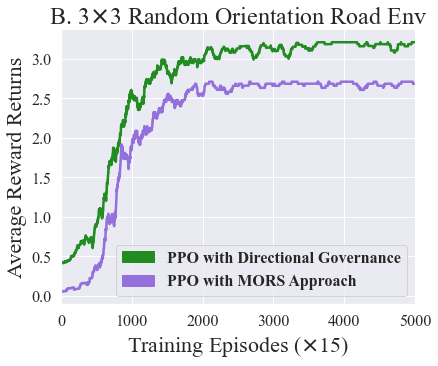

In [ ]:
# plotter function output for the models under comparison    
plot_vanilla([ arr , arr1 ], 5000)

#### 3. Third Performance Comparison Subplot

In [ ]:
# loading the csv file data into pandas dataframe
# TODO: the path below needs to be update based on your project setup
tmp_df = pd.read_csv('drive/MyDrive/rl_individual_project/experiment-data/experiment-three/5x5-ppo-gov-results.csv')
tmp_df.head()

,r,l,t
0,1.71,35,0.037785
1,0.36,35,0.064787
2,2.13,35,0.092022
3,0.87,35,0.118438
4,0.66,35,0.146417


In [ ]:
# loading the csv file data into pandas dataframe
# TODO: the path below needs to be update based on your project setup
tmp1_df = pd.read_csv('drive/MyDrive/rl_individual_project/experiment-data/experiment-three/5x5-ppo-rew-shap-results.csv')
tmp1_df.head()

,r,l,t
0,-0.15,35,0.039933
1,0.16,35,0.071728
2,-0.12,35,0.098999
3,0.20,35,0.130853
4,0.19,35,0.157118


In [ ]:
# moving average value calculator function
# for generating more smoother convergence plots
# calculating the moving average value for the two comparative models
arr = moving_average(list(tmp_df['r']), 100)
arr1 = moving_average(list(tmp1_df['r']), 100)

In [ ]:
# plotter function for plotting the two comparative models with hard-coded
# labels, titles, timestep cut-off threshold and color combinations
def plot_vanilla(data_list, min_len):
    sns.set_style("whitegrid", {'axes.grid' : True,
                            'axes.edgecolor':'black'

                            })
    fig = plt.figure()
    sns.set(font="Times New Roman", rc={'figure.figsize':(6.25,5.25)})
    sns.set_style({'font.family': 'Times New Roman'})
    plt.clf()
    ax = fig.gca()
    colors = [ "forestgreen", "mediumpurple"]
    labels = ["PPO with Directional Governance", "PPO with MORS Approach"]
    color_patch = []
    for color, label, data in zip(colors, labels, data_list):
        sns.lineplot(data=data, color=color, linewidth=2.5)
        color_patch.append(mpatches.Patch(color=color, label=label))
    print(min_len)
    plt.xlim([0, min_len])
    plt.xlabel('Training Episodes ($\\times$30)', fontsize=22)
    plt.ylabel('Average Reward Returns', fontsize=22)
    lgd=plt.legend(
    frameon=True, fancybox=True, \
    # prop={'size':14}, handles=color_patch, loc="best")
    prop={'weight':'bold', 'size':16}, handles=color_patch, loc="best")
    plt.title('C. 5$\\times$5 Road Env', fontsize=24 )
    ax = plt.gca()
    # ax.set_xticks([10, 20, 30, 40, 50])
    # ax.set_xticklabels([0.5, 1, 1.5, 2.5, 3.0])

    plt.setp(ax.get_xticklabels(), fontsize=16)
    plt.setp(ax.get_yticklabels(), fontsize=16)
    sns.despine()
    plt.tight_layout()
    plt.show()

2500


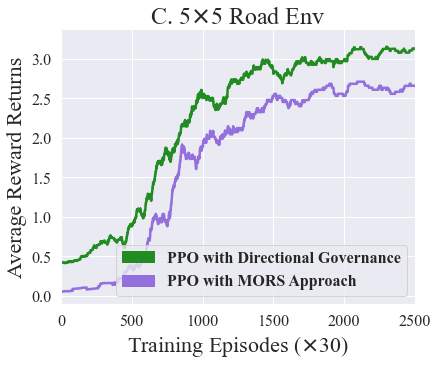

In [ ]:
# plotter function output for the models under comparison    
plot_vanilla([ arr , arr1 ], 2500)

#### 4. Fourth Performance Comparison Subplot

In [ ]:
# loading the csv file data into pandas dataframe
# TODO: the path below needs to be update based on your project setup
tmp_df = pd.read_csv('drive/MyDrive/rl_individual_project/experiment-data/experiment-three/rand-5x5-ppo-gov-results.csv')
tmp_df.head()

,r,l,t
0,0.93,35,0.033843
1,1.18,35,0.057642
2,1.42,35,0.081421
3,2.25,35,0.104692
4,1.17,35,0.127970


In [ ]:
# loading the csv file data into pandas dataframe
# TODO: the path below needs to be update based on your project setup
tmp1_df = pd.read_csv('drive/MyDrive/rl_individual_project/experiment-data/experiment-three/rand-5x5-ppo-rew-shap-results.csv')
tmp1_df.head()

,r,l,t
0,0.60,35,0.033683
1,-0.29,35,0.057993
2,-0.02,35,0.081153
3,0.01,35,0.104526
4,-0.05,35,0.127784


In [ ]:
# calculating the moving average value for the two comparative models
arr = moving_average(list(tmp_df['r']), 100)
arr1 = moving_average(list(tmp1_df['r']), 100)

In [ ]:
# plotter function for plotting the two comparative models with hard-coded
# labels, titles, timestep cut-off threshold and color combinations
def plot_vanilla(data_list, min_len):
    sns.set_style("whitegrid", {'axes.grid' : True,
                            'axes.edgecolor':'black'

                            })
    fig = plt.figure()
    sns.set(font="Times New Roman", rc={'figure.figsize':(6.25,5.25)})
    sns.set_style({'font.family': 'Times New Roman'})
    plt.clf()
    ax = fig.gca()
    colors = [ "forestgreen", "mediumpurple"]
    labels = ["PPO with Directional Governance", "PPO with MORS Approach"]
    color_patch = []
    for color, label, data in zip(colors, labels, data_list):
        sns.lineplot(data=data, color=color, linewidth=2.5)
        color_patch.append(mpatches.Patch(color=color, label=label))
    print(min_len)
    plt.xlim([0, min_len])
    plt.xlabel('Training Episodes ($\\times$30)', fontsize=22)
    plt.ylabel('Average Reward Returns', fontsize=22)
    lgd=plt.legend(
    frameon=True, fancybox=True, \
    # prop={'size':14}, handles=color_patch, loc="best")
    prop={'weight':'bold', 'size':16}, handles=color_patch, loc="best")
    plt.title('D. 5$\\times$5 Random Orientation Road Env', fontsize=24 )
    ax = plt.gca()
    # ax.set_xticks([10, 20, 30, 40, 50])
    # ax.set_xticklabels([0.5, 1, 1.5, 2.5, 3.0])

    plt.setp(ax.get_xticklabels(), fontsize=16)
    plt.setp(ax.get_yticklabels(), fontsize=16)
    sns.despine()
    plt.tight_layout()
    plt.show()

2500


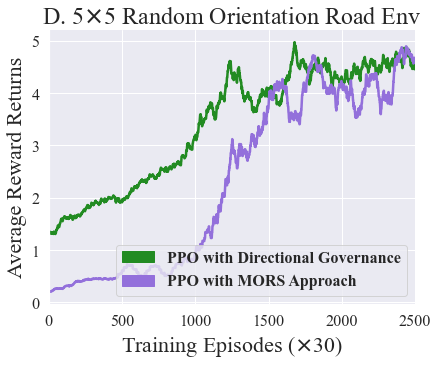

In [ ]:
# plotter function output for the models under comparison
plot_vanilla([ arr , arr1 ], 2500)

<a id='approach-scalability-analysis-experiment'></a>
### Approach Scalability Analysis Experiment

In this section we load the result summary files recorded from Gym Monitor wrapper and plot the experiment result subplots from the plotter function.
This section contains visualization of experiment csv files from the 5x5 and 10x10 grid sizes for scalability performance analysis.
We follow the stated workflow steps below in the section for reference.

* First, we again observe the list of experiment files generated for our scalability comparison experiment.
* Load the respective comparative model logs into pandas dataframe and calculate the moving average reward score for smoother plotting.
* Finally, for all the four loaded subplots, corresponding experiment _csv_ files are fed into defined their _plot\_vanilla_ plotter function with appropriate titles, labels, and color combinations.

`Note:` The specified _directory paths_ will vary based on your project structure, please update those paths based on your requirement. The keyword `TODO` is added on the code cells where path update is required.

#### 1. First Performance Comparison Subplot

In [ ]:
# TODO: the path below needs to be update based on your project setup
!ls drive/MyDrive/rl_individual_project/experiment-data/experiment-two

10x10-ppo-gov-results.csv	  rand-10x10-ppo-gov-results.csv
10x10-ppo-greedy-gov-results.csv  rand-10x10-ppo-greedy-gov-results.csv
5x5-ppo-gov-results.csv		  rand-5x5-ppo-gov-results.csv
5x5-ppo-greedy-gov-results.csv	  rand-5x5-ppo-greedy-gov-results.csv


In [ ]:
# loading the csv file data into pandas dataframe
# TODO: the path below needs to be update based on your project setup
tmp_df = pd.read_csv('drive/MyDrive/rl_individual_project/experiment-data/experiment-two/5x5-ppo-gov-results.csv')
tmp_df.head()

,r,l,t
0,1.24,70,0.680403
1,2.20,70,0.836650
2,2.62,70,0.936345
3,1.69,70,1.041439
4,1.10,70,1.134576


In [ ]:
# loading the csv file data into pandas dataframe
# TODO: the path below needs to be update based on your project setup
tmp1_df = pd.read_csv('drive/MyDrive/rl_individual_project/experiment-data/experiment-two/5x5-ppo-greedy-gov-results.csv')
tmp1_df.head()

,r,l,t
0,0.95,70,0.063938
1,0.53,70,0.114795
2,1.02,70,0.166731
3,0.14,70,0.219841
4,0.29,70,0.273176


In [ ]:
# moving average value calculator function
# for generating more smoother convergence plots
def moving_average(values, window):
    """
    Smooth values by doing a moving average
    :param values: (numpy array)
    :param window: (int)
    :return: (numpy array)
    """
    weights = np.repeat(1.0, window) / window
    return np.convolve(values, weights, 'valid')

In [ ]:
# calculating the moving average value for the two comparative models
arr = moving_average(list(tmp_df['r']), 100)
arr1 = moving_average(list(tmp1_df['r']), 100)

In [ ]:
# plotter function for plotting the two comparative models with hard-coded
# labels, titles, timestep cut-off threshold and color combinations
def plot_vanilla(data_list, min_len):
    sns.set_style("whitegrid", {'axes.grid' : True,
                            'axes.edgecolor':'black'

                            })
    fig = plt.figure()
    sns.set(font="Times New Roman", rc={'figure.figsize':(6.25,5.25)})
    sns.set_style({'font.family': 'Times New Roman'})
    plt.clf()
    ax = fig.gca()
    colors = [ "forestgreen", "darkorange"]
    labels = ["PPO with Directional Governance", "PPO with Directional Greedy Governance"]
    color_patch = []
    for color, label, data in zip(colors, labels, data_list):
        sns.lineplot(data=data, color=color, linewidth=2.5)
        color_patch.append(mpatches.Patch(color=color, label=label))
    print(min_len)
    plt.xlim([0, min_len])
    plt.xlabel('Training Episodes ($\\times$30)', fontsize=22)
    plt.ylabel('Average Reward Returns', fontsize=22)
    lgd=plt.legend(
    frameon=True, fancybox=True, \
    # prop={'size':14}, handles=color_patch, loc="best")
    prop={'weight':'bold', 'size':16}, handles=color_patch, loc="best")
    plt.title('A. 5$\\times$5 Road Env', fontsize=24 )
    ax = plt.gca()
    # ax.set_xticks([10, 20, 30, 40, 50])
    # ax.set_xticklabels([0.5, 1, 1.5, 2.5, 3.0])

    plt.setp(ax.get_xticklabels(), fontsize=16)
    plt.setp(ax.get_yticklabels(), fontsize=16)
    sns.despine()
    plt.tight_layout()
    plt.show()

2500


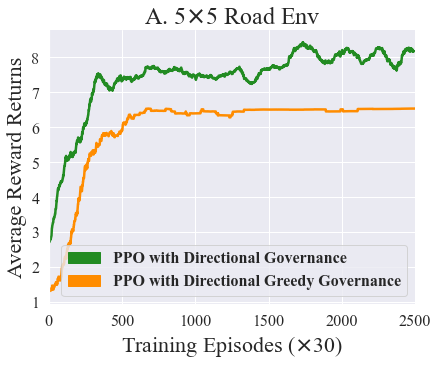

In [ ]:
# plotter function output for the models under comparison   
plot_vanilla([ arr , arr1 ], 2500)

#### 2. Second Performance Comparison Subplot

In [ ]:
# loading the csv file data into pandas dataframe
# TODO: the path below needs to be update based on your project setup
tmp_df = pd.read_csv('drive/MyDrive/rl_individual_project/experiment-data/experiment-two/rand-5x5-ppo-gov-results.csv')
tmp_df.head()

,r,l,t
0,3.40,70,0.074056
1,0.60,70,0.127643
2,1.89,70,0.180115
3,4.16,70,0.231481
4,1.10,70,0.286703


In [ ]:
# loading the csv file data into pandas dataframe
# TODO: the path below needs to be update based on your project setup
tmp1_df = pd.read_csv('drive/MyDrive/rl_individual_project/experiment-data/experiment-two/rand-5x5-ppo-greedy-gov-results.csv')
tmp1_df.head()

,r,l,t
0,2.79,49,0.342146
1,3.83,49,0.364750
2,0.51,49,0.386350
3,3.14,49,0.431485
4,2.52,49,0.471531


In [ ]:
# moving average value calculator function
# for generating more smoother convergence plots
# calculating the moving average value for the two comparative models
arr = moving_average(list(tmp_df['r']), 100)
arr1 = moving_average(list(tmp1_df['r']), 100)

In [ ]:
# plotter function for plotting the two comparative models with hard-coded
# labels, titles, timestep cut-off threshold and color combinations
def plot_vanilla(data_list, min_len):
    sns.set_style("whitegrid", {'axes.grid' : True,
                            'axes.edgecolor':'black'

                            })
    fig = plt.figure()
    sns.set(font="Times New Roman", rc={'figure.figsize':(6.25,5.25)})
    sns.set_style({'font.family': 'Times New Roman'})
    plt.clf()
    ax = fig.gca()
    colors = [ "forestgreen", "darkorange"]
    labels = ["PPO with Directional Governance", "PPO with Directional Greedy Governance"]
    color_patch = []
    for color, label, data in zip(colors, labels, data_list):
        sns.lineplot(data=data, color=color, linewidth=2.5)
        color_patch.append(mpatches.Patch(color=color, label=label))
    print(min_len)
    plt.xlim([0, min_len])
    plt.xlabel('Training Episodes ($\\times$50)', fontsize=22)
    plt.ylabel('Average Reward Returns', fontsize=22)
    lgd=plt.legend(
    frameon=True, fancybox=True, \
    # prop={'size':14}, handles=color_patch, loc="best")
    prop={'weight':'bold', 'size':16}, handles=color_patch, loc="best")
    plt.title('B. 5$\\times$5 Random Orientation Road Env', fontsize=24 )
    ax = plt.gca()
    # ax.set_xticks([10, 20, 30, 40, 50])
    # ax.set_xticklabels([0.5, 1, 1.5, 2.5, 3.0])

    plt.setp(ax.get_xticklabels(), fontsize=16)
    plt.setp(ax.get_yticklabels(), fontsize=16)
    sns.despine()
    plt.tight_layout()
    plt.show()

1500


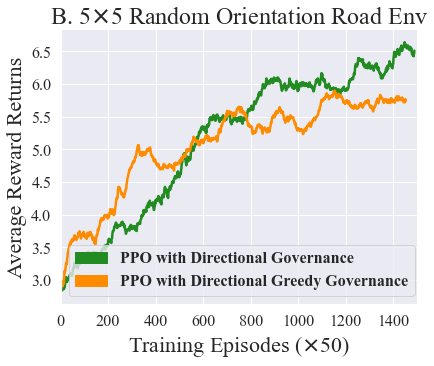

In [ ]:
# plotter function output for the models under comparison
plot_vanilla([ arr , arr1 ], 1500)

#### 3. Third Performance Comparison Subplot

In [ ]:
# loading the csv file data into pandas dataframe
# TODO: the path below needs to be update based on your project setup
tmp_df = pd.read_csv('drive/MyDrive/rl_individual_project/experiment-data/experiment-two/10x10-ppo-gov-results.csv')
tmp_df.head()

,r,l,t
0,-12.70,119,0.095914
1,10.97,119,0.187083
2,7.63,119,0.271269
3,27.75,119,0.361621
4,36.16,119,0.445967


In [ ]:
# loading the other comparative csv file data into pandas dataframe
# TODO: the path below needs to be update based on your project setup
tmp1_df = pd.read_csv('drive/MyDrive/rl_individual_project/experiment-data/experiment-two/10x10-ppo-greedy-gov-results.csv')
tmp1_df.head()

,r,l,t
0,10.44,119,0.112820
1,-2.39,119,0.210870
2,-9.51,119,0.296401
3,-4.87,119,0.389579
4,2.30,119,0.478809


In [ ]:
# calculating the moving average value for the two comparative models
arr = moving_average(list(tmp_df['r']), 50)
arr1 = moving_average(list(tmp1_df['r`']), 50)

In [ ]:
# plotter function for plotting the two comparative models with hard-coded
# labels, titles, timestep cut-off threshold and color combinations
def plot_vanilla(data_list, min_len):
    sns.set_style("whitegrid", {'axes.grid' : True,
                            'axes.edgecolor':'black'

                            })
    fig = plt.figure()
    sns.set(font="Times New Roman", rc={'figure.figsize':(6.25,5.25)})
    sns.set_style({'font.family': 'Times New Roman'})
    plt.clf()
    ax = fig.gca()
    colors = [ "forestgreen", "darkorange"]
    labels = ["PPO with Directional Governance", "PPO with Directional Greedy Governance"]
    color_patch = []
    for color, label, data in zip(colors, labels, data_list):
        sns.lineplot(data=data, color=color, linewidth=2.5)
        color_patch.append(mpatches.Patch(color=color, label=label))
    print(min_len)
    plt.xlim([0, min_len])
    plt.xlabel('Training Episodes ($\\times$100)', fontsize=22)
    plt.ylabel('Average Reward Returns', fontsize=22)
    lgd=plt.legend(
    frameon=True, fancybox=True, \
    # prop={'size':14}, handles=color_patch, loc="best")
    prop={'weight':'bold', 'size':16}, handles=color_patch, loc="best")
    plt.title('C. 10$\\times$10 Road Env', fontsize=24 )
    ax = plt.gca()
    # ax.set_xticks([10, 20, 30, 40, 50])
    # ax.set_xticklabels([0.5, 1, 1.5, 2.5, 3.0])

    plt.setp(ax.get_xticklabels(), fontsize=16)
    plt.setp(ax.get_yticklabels(), fontsize=16)
    sns.despine()
    plt.tight_layout()
    plt.show()
    

800


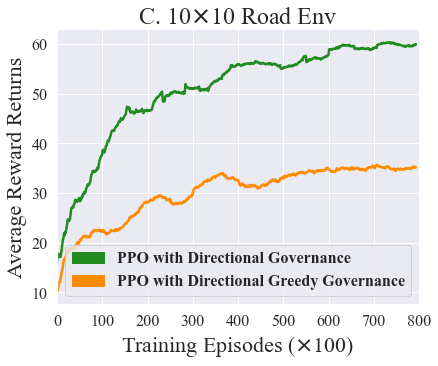

In [ ]:
# plotter function output for the models under comparison
plot_vanilla([ arr , arr1 ], 800)

#### 4. Fourth Performance Comparison Subplot

In [ ]:
# loading the csv file data into pandas dataframe
# TODO: the path below needs to be update based on your project setup
tmp_df = pd.read_csv('drive/MyDrive/rl_individual_project/experiment-data/experiment-two/rand-10x10-ppo-gov-results.csv')
tmp_df.head()

,r,l,t
0,-17.34,119,0.102384
1,-8.84,119,0.191190
2,36.91,119,0.289367
3,20.55,119,0.389383
4,8.27,119,0.477714


In [ ]:
# loading the other comparative csv file data into pandas dataframe
# TODO: the path below needs to be update based on your project setup
tmp1_df = pd.read_csv('drive/MyDrive/rl_individual_project/experiment-data/experiment-two/rand-10x10-ppo-greedy-gov-results.csv')
tmp1_df.head()

,r,l,t
0,6.21,119,0.100086
1,16.75,119,0.192282
2,12.99,119,0.279896
3,8.82,119,0.370054
4,16.92,119,0.463602


In [ ]:
# calculating the moving average value for the two comparative models
arr = moving_average(list(tmp_df['r']), 50)
arr1 = moving_average(list(tmp1_df['r']), 50)

In [ ]:
# plotter function for plotting the two comparative models with hard-coded
# labels, titles, timestep cut-off threshold and color combinations
def plot_vanilla(data_list, min_len):
    sns.set_style("whitegrid", {'axes.grid' : True,
                            'axes.edgecolor':'black'

                            })
    fig = plt.figure()
    sns.set(font="Times New Roman", rc={'figure.figsize':(6.25,5.25)})
    sns.set_style({'font.family': 'Times New Roman'})
    plt.clf()
    ax = fig.gca()
    colors = [ "forestgreen", "darkorange"]
    labels = ["PPO with Directional Governance", "PPO with Directional Greedy Governance"]
    color_patch = []
    for color, label, data in zip(colors, labels, data_list):
        sns.lineplot(data=data, color=color, linewidth=2.5)
        color_patch.append(mpatches.Patch(color=color, label=label))
    print(min_len)
    plt.xlim([0, min_len])
    plt.xlabel('Training Episodes ($\\times$100)', fontsize=22)
    plt.ylabel('Average Reward Returns', fontsize=22)
    lgd=plt.legend(
    frameon=True, fancybox=True, \
    # prop={'size':14}, handles=color_patch, loc="best")
    prop={'weight':'bold', 'size':16}, handles=color_patch, loc="best")
    plt.title('D. 10$\\times$10 Random Orientation Road Env', fontsize=24 )
    ax = plt.gca()
    # ax.set_xticks([10, 20, 30, 40, 50])
    # ax.set_xticklabels([0.5, 1, 1.5, 2.5, 3.0])

    plt.setp(ax.get_xticklabels(), fontsize=16)
    plt.setp(ax.get_yticklabels(), fontsize=16)
    sns.despine()
    plt.tight_layout()
    plt.show()

800


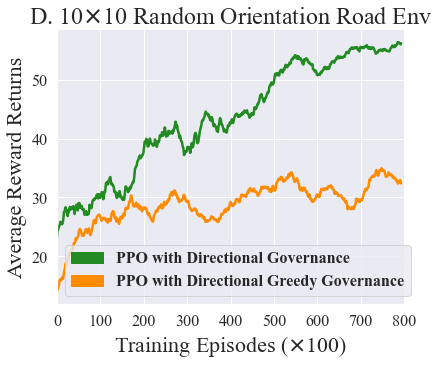

In [ ]:
# plotter function output for the models under comparison
plot_vanilla([ arr , arr1 ], 800)

<a id='dynamic-agent-interactions-analysis-experiment'></a>
#### Dynamic Agent Interactions Analysis Experiment

In this section we load the result summary files recorded from Gym Monitor wrapper and plot the experiment result subplots from the plotter function.
This section contains visualization of experiment csv files from the 3x3 and 5x5 grid sizes for dynamic agent interaction analysis.
We follow the stated workflow steps below in the section for reference.

* First, we again observe the list of experiment files generated for our scalability comparison experiment.
* Load the respective comparative model logs into pandas dataframe and calculate the moving average reward score for smoother plotting.
* Finally, for all the two loaded subplots, corresponding experiment _csv_ files are fed into defined their _plot\_vanilla_ plotter function with appropriate titles, labels, and color combinations.

`Note:` The specified _directory paths_ will vary based on your project structure, please update those paths based on your requirement. The keyword `TODO` is added on the code cells where path update is required.

#### 1. First Performance Comparison Subplot

In [ ]:
# TODO: the path below needs to be update based on your project setup
!ls drive/MyDrive/rl_individual_project/experiment-data/experiment-four

3x3-ppo-gov-results.csv		rand-3x3-ppo-gov-results.csv
3x3-ppo-greedy-gov-results.csv	rand-3x3-ppo-greedy-gov-results.csv
5x5-ppo-gov-results.csv		rand-5x5-ppo-gov-results.csv
5x5-ppo-greedy-gov-results.csv	rand-5x5-ppo-greedy-gov-results.csv


In [ ]:
# loading the csv file data into pandas dataframe
# TODO: the path below needs to be update based on your project setup
tmp_df = pd.read_csv('drive/MyDrive/rl_individual_project/experiment-data/experiment-four/3x3-ppo-gov-results.csv')
tmp_df.head()

,r,l,t
0,3.12,22,0.339900
1,0.77,22,0.349005
2,0.59,28,0.361414
3,0.56,32,0.376695
4,0.55,28,0.388523


In [ ]:
# loading the other comparative csv file data into pandas dataframe
# TODO: the path below needs to be update based on your project setup
tmp_df1 = pd.read_csv('drive/MyDrive/rl_individual_project/experiment-data/experiment-four/3x3-ppo-greedy-gov-results.csv')
tmp_df1.head()

,r,l,t
0,0.34,18,0.020380
1,0.32,26,0.031624
2,0.29,28,0.044540
3,0.38,18,0.052667
4,0.34,32,0.068552


In [ ]:
# loading the other comparative csv file data into pandas dataframe
# TODO: the path below needs to be update based on your project setup
tmp_df2 = pd.read_csv('drive/MyDrive/rl_individual_project/experiment-data/experiment-four/rand-3x3-ppo-gov-results.csv')
tmp_df2.head()

,r,l,t
0,2.89,12,0.014825
1,0.71,22,0.024081
2,0.65,24,0.034678
3,3.07,14,0.041271
4,0.53,32,0.056716


In [ ]:
# loading the other comparative csv file data into pandas dataframe
# TODO: the path below needs to be update based on your project setup
tmp_df3 = pd.read_csv('drive/MyDrive/rl_individual_project/experiment-data/experiment-four/rand-3x3-ppo-greedy-gov-results.csv')
tmp_df3.head()

,r,l,t
0,0.38,28,0.019582
1,0.27,32,0.034369
2,0.36,24,0.045606
3,0.31,32,0.059857
4,0.30,32,0.074090


In [ ]:
# moving average value calculator function
# for generating more smoother convergence plots
def moving_average(values, window):
    """
    Smooth values by doing a moving average
    :param values: (numpy array)
    :param window: (int)
    :return: (numpy array)
    """
    weights = np.repeat(1.0, window) / window
    return np.convolve(values, weights, 'valid')

In [ ]:
# calculating the moving average value for the two comparative models
arr = moving_average(list(tmp_df['r']), 100)
arr1 = moving_average(list(tmp_df1['r']), 100)
arr2 = moving_average(list(tmp_df2['r']), 100)
arr3 = moving_average(list(tmp_df3['r']), 100)

In [ ]:
# plotter function for plotting the two comparative models with hard-coded
# labels, titles, timestep cut-off threshold and color combinations
def plot_vanilla(data_list, min_len):
    sns.set_style("whitegrid", {'axes.grid' : True,
                            'axes.edgecolor':'black'

                            })
    fig = plt.figure()
    sns.set(font="Times New Roman", rc={'figure.figsize':(9.5,6.0)})
    sns.set_style({'font.family': 'Times New Roman'})
    plt.clf()
    ax = fig.gca()
    colors = [ "olive", "indianred", "cadetblue", "darkorchid"]
    labels = ["Baseline Governance", "Greedy Baseline Governance",
              "Governance in Rand Env", "Greedy Governance in Rand Env"]
    color_patch = []
    for color, label, data in zip(colors, labels, data_list):
        sns.lineplot(data=data, color=color, linewidth=2.5)
        color_patch.append(mpatches.Patch(color=color, label=label))
    print(min_len)
    plt.xlim([0, min_len])
    plt.xlabel('Training Episodes ($\\times$15)', fontsize=26)
    plt.ylabel('Average Reward Returns', fontsize=26)
    lgd=plt.legend(
    frameon=True, fancybox=True, \
    # prop={'size':14}, handles=color_patch, loc="best")
    prop={'weight':'bold', 'size':26}, handles=color_patch, loc="best")
    plt.title('A. Regular and Random Orientation in 3$\\times$3 Road Env', fontsize=28 )
    ax = plt.gca()
    # ax.set_xticks([10, 20, 30, 40, 50])
    # ax.set_xticklabels([0.5, 1, 1.5, 2.5, 3.0])

    plt.setp(ax.get_xticklabels(), fontsize=26)
    plt.setp(ax.get_yticklabels(), fontsize=26)
    sns.despine()
    plt.tight_layout()
    plt.show()

5000


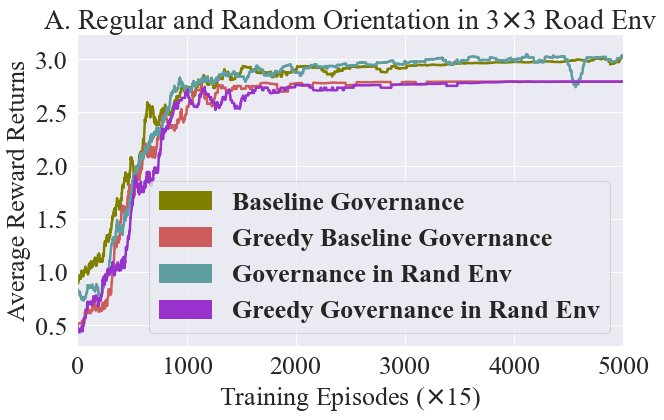

In [ ]:
# plotter function output for the models under comparison
plot_vanilla([ arr , arr1, arr2, arr3 ], 5000)

#### 2. Second Performance Comparison Subplot

In [ ]:
# loading the csv file data into pandas dataframe
# TODO: the path below needs to be update based on your project setup
tmp_df = pd.read_csv('drive/MyDrive/rl_individual_project/experiment-data/experiment-four/5x5-ppo-gov-results.csv')
tmp_df.head()

,r,l,t
0,0.81,35,0.467831
1,0.97,35,0.499011
2,1.40,35,0.532686
3,1.51,35,0.559480
4,1.52,35,0.588759


In [ ]:
# loading the other comparative csv file data into pandas dataframe
# TODO: the path below needs to be update based on your project setup
tmp_df1 = pd.read_csv('drive/MyDrive/rl_individual_project/experiment-data/experiment-four/5x5-ppo-greedy-gov-results.csv')
tmp_df1.head()

,r,l,t
0,0.31,35,0.026667
1,0.51,35,0.042461
2,0.77,35,0.058156
3,0.40,35,0.074718
4,0.65,35,0.090601


In [ ]:
# loading the other comparative csv file data into pandas dataframe
# TODO: the path below needs to be update based on your project setup
tmp_df2 = pd.read_csv('drive/MyDrive/rl_individual_project/experiment-data/experiment-four/rand-5x5-ppo-gov-results.csv')
tmp_df2.head()

,r,l,t
0,0.21,35,0.026240
1,1.13,35,0.044158
2,2.07,35,0.060205
3,1.03,35,0.076136
4,-0.17,35,0.092185


In [ ]:
# loading the other comparative csv file data into pandas dataframe
# TODO: the path below needs to be update based on your project setup
tmp_df3 = pd.read_csv('drive/MyDrive/rl_individual_project/experiment-data/experiment-four/rand-5x5-ppo-greedy-gov-results.csv')
tmp_df3.head()

,r,l,t
0,1.15,35,0.026761
1,0.82,35,0.042846
2,0.89,35,0.058861
3,0.82,35,0.074567
4,0.75,35,0.090667


In [ ]:
# calculating the moving average value for the two comparative models
arr = moving_average(list(tmp_df['r']), 100)
arr1 = moving_average(list(tmp_df1['r']), 100)
arr2 = moving_average(list(tmp_df2['r']), 100)
arr3 = moving_average(list(tmp_df3['r']), 100)

In [ ]:
# plotter function for plotting the two comparative models with hard-coded
# labels, titles, timestep cut-off threshold and color combinations
def plot_vanilla(data_list, min_len):
    sns.set_style("whitegrid", {'axes.grid' : True,
                            'axes.edgecolor':'black'

                            })
    fig = plt.figure()
    sns.set(font="Times New Roman", rc={'figure.figsize':(9.5,6.0)})
    sns.set_style({'font.family': 'Times New Roman'})
    plt.clf()
    ax = fig.gca()
    colors = [ "olive", "indianred", "cadetblue", "darkorchid"]
    labels = ["Directional Governance", "Greedy Directional Governance",
              "Governance in Rand Env", "Greedy Governance in Rand Env"]
    color_patch = []
    for color, label, data in zip(colors, labels, data_list):
        sns.lineplot(data=data, color=color, linewidth=2.5)
        color_patch.append(mpatches.Patch(color=color, label=label))
    print(min_len)
    plt.xlim([0, min_len])
    plt.xlabel('Training Episodes ($\\times$30)', fontsize=26)
    plt.ylabel('Average Reward Returns', fontsize=26)
    lgd=plt.legend(
    frameon=True, fancybox=True, \
    # prop={'size':14}, handles=color_patch, loc="best")
    prop={'weight':'bold', 'size':26}, handles=color_patch, loc='best')
    plt.title('B. Regular and Random Orientation in 5$\\times$5 Road Env', fontsize=28)
    ax = plt.gca()
    # ax.set_xticks([10, 20, 30, 40, 50])
    # ax.set_xticklabels([0.5, 1, 1.5, 2.5, 3.0])

    plt.setp(ax.get_xticklabels(), fontsize=24)
    plt.setp(ax.get_yticklabels(), fontsize=24)
    sns.despine()
    plt.tight_layout()
    plt.show()

3333


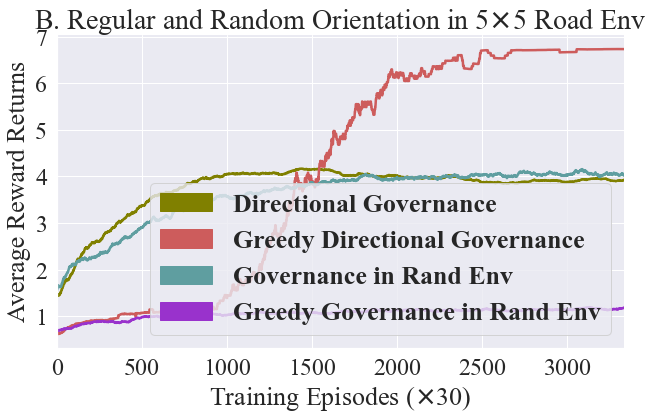

In [ ]:
# plotter function output for the models under comparison
plot_vanilla([ arr , arr1, arr2, arr3 ], 3333)